In [1]:
import os
import sys 
import glob
import dask
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

import cmcrameri.cm as cmc
import drama.utils as drtls
from drama.performance.sar.antenna_patterns import sinc_bp, phased_array

from dataclasses import dataclass
from typing import Callable, Union, List, Dict, Any
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class
from leakage.misc import round_to_hour, angular_difference, calculate_distance

In [2]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"

scenarios = [
    'Aghulas_20200309',
    'Aghulas_20200321',
    'Aghulas_20200402',
    'Aghulas_20200414',
    'Aghulas_20200426'
    ]

In [3]:
noises = []
signals = []
results = []
for scenario in scenarios:
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=25_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=150,
        antenna_length=2.87,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42,
        fill_nan_limit = None,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        # _speckle_noise= True
        )
    test.apply()
    # net_leakage = test.data.V_leakage_pulse_rg_subscene - test.data.V_leakage_pulse_rg_subscene_inverted
    # noises.append(net_leakage)

    data_dir_dca = "/Users/opodriscoll/Documents/Data/Sentinel1/DCA/"
    files_dca = glob.glob(f"{data_dir_dca+scenario}/*.nc")
    # files_dca = [file for file in files_dca if 'S1A' in file]
    
    add_dca_to_leakage_class(test, files_dca=files_dca)
    # signal = test.data.V_dca_pulse_rg_subscene
    # signals.append(signal)
    results.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:304: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200309/0D9A_2A1B_4B1D_63F6_9B2F_FAFB_res150.nc


2024-04-23 14:13:27,533 INFO Welcome to the CDS
2024-04-23 14:13:27,534 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-23 14:13:27,605 INFO Request is queued
2024-04-23 14:13:28,657 INFO Request is running
2024-04-23 14:13:32,503 INFO Request is completed
2024-04-23 14:13:32,505 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/adaptor.mars.internal-1713874411.944263-26412-15-08fe767f-e88c-44cc-9051-a09f9dd25771.nc to ../../data/leakage/era5_winds/era5_20200309h1800_lat-35_7_lon18_3.nc (5.5K)
2024-04-23 14:13:32,758 INFO Download rate 21.6K/s


Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200309h1800_lat-35_7_lon18_3.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:304: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200321/0407_0528_2434_7A73_BC55_E4A7_res150.nc


2024-04-23 14:18:31,570 INFO Welcome to the CDS
2024-04-23 14:18:31,570 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-23 14:18:31,672 INFO Request is completed
2024-04-23 14:18:31,674 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/adaptor.mars.internal-1713872938.0478125-18250-18-e2ef01ba-cced-4f4d-a5bc-4b24af63c319.nc to ../../data/leakage/era5_winds/era5_20200321h1800_lat-35_7_lon18_3.nc (5.5K)
2024-04-23 14:18:31,871 INFO Download rate 28K/s


Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200321h1800_lat-35_7_lon18_3.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:304: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200402/6711_9DCB_A4DE_E160_E5C6_FD45_res150.nc


2024-04-23 14:23:37,528 INFO Welcome to the CDS
2024-04-23 14:23:37,529 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-23 14:23:37,631 INFO Request is queued
2024-04-23 14:23:40,227 INFO Request is running
2024-04-23 14:23:42,530 INFO Request is completed
2024-04-23 14:23:42,532 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/adaptor.mars.internal-1713875022.244078-20289-14-acab56b4-9a79-4a60-9339-f187bf4a0f11.nc to ../../data/leakage/era5_winds/era5_20200402h1800_lat-35_7_lon18_3.nc (5.5K)
2024-04-23 14:23:42,774 INFO Download rate 22.8K/s


Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200402h1800_lat-35_7_lon18_3.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:304: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200414/1D90_53E2_5873_AD57_BF28_D8EC_res150.nc


2024-04-23 14:28:36,546 INFO Welcome to the CDS
2024-04-23 14:28:36,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-23 14:28:36,638 INFO Request is completed
2024-04-23 14:28:36,640 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1713873573.2513397-8644-14-dd381740-19f2-4838-95bc-26c17ef0d0a4.nc to ../../data/leakage/era5_winds/era5_20200414h1800_lat-35_7_lon18_3.nc (5.5K)
2024-04-23 14:28:36,819 INFO Download rate 30.6K/s


Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200414h1800_lat-35_7_lon18_3.nc


/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:304: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Aghulas_20200426/1BD9_4FDB_70EB_7666_DC9A_E3C8_res150.nc


2024-04-23 14:33:34,670 INFO Welcome to the CDS
2024-04-23 14:33:34,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-04-23 14:33:34,790 INFO Request is completed
2024-04-23 14:33:34,792 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/adaptor.mars.internal-1713873889.027624-25604-15-e8b05990-3776-4682-ba23-855c08e022a5.nc to ../../data/leakage/era5_winds/era5_20200426h1800_lat-35_7_lon18_3.nc (5.5K)
2024-04-23 14:33:34,982 INFO Download rate 28.8K/s


Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_20200426h1800_lat-35_7_lon18_3.nc


In [7]:
func_rmse = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)).values*1, rounding)

In [59]:
samples = results #results[:3] + [results[-1]] # results

noises = [result.data.V_leakage_pulse_rg_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]
backscatters = [result.data.nrcs_scat for result in samples]
signals = [result.data.V_dca_pulse_rg_subscene for result in samples]
currents =  [result.data.V_dca_pulse_rg_subscene - result.data.V_wb_pulse_rg_subscene for result in samples]

In [60]:
ds_noise = xr.concat(noises, dim = 'time')#.T.plot(robust = True, cmap = cmc.vik)
ds_currents = xr.concat(currents, dim = 'time')#.T.plot(robust = True, cmap = cmc.vik)
ds_nrcs = xr.concat(backscatters, dim = 'time')

clip_1 = ds_currents/ds_currents
clip_2 = ds_noise/ds_noise

ds_noise = ds_noise * clip_1
ds_signal = ds_currents * clip_2

ds_noise_mean = ds_noise.mean(dim = 'time')
ds_noise_std = ds_noise.std(dim = 'time')
ds_signal_mean = ds_signal.mean(dim = 'time')
print('noise:', func_rmse(ds_noise_mean), [func_rmse(i) for i in noises], '\n')
print('signal:', func_rmse(ds_signal_mean), [func_rmse(i) for i in currents], '\n')

noise: 0.313 [0.569, 0.566, 0.569, 0.827, 0.555] 

signal: 0.177 [0.38, 0.466, 0.674, 0.483, 0.612] 



In [61]:
(np.mean([func_rmse(i) for i in noises]), np.mean([func_rmse(i) for i in currents])) / np.sqrt(len(samples)) 

array([0.27602023, 0.23389271])

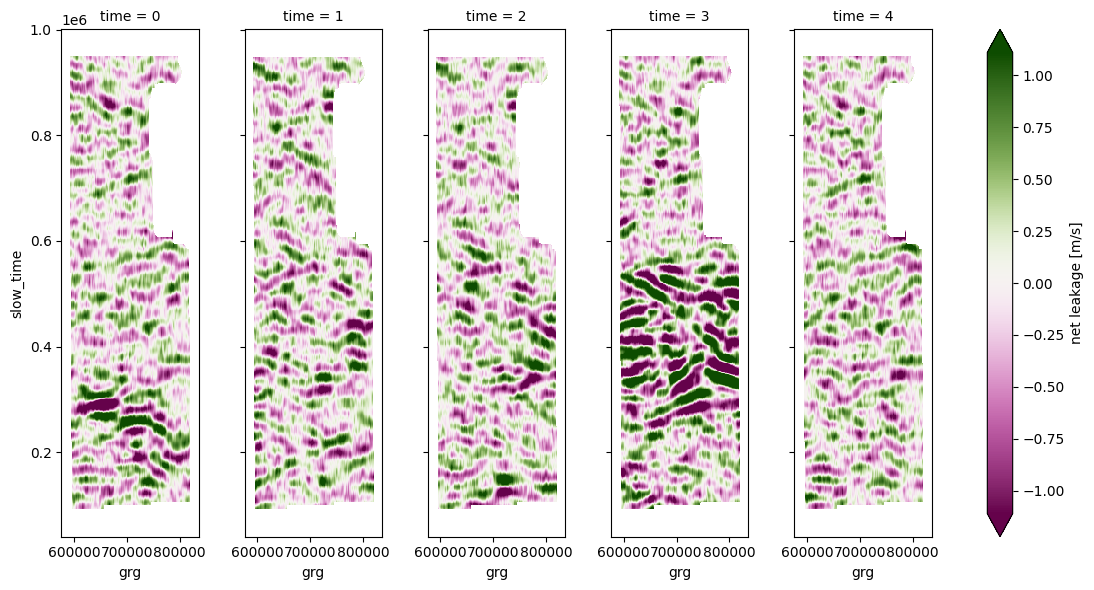

In [62]:
a = ds_noise.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.bam, figsize = (12,6), cbar_kwargs = {'label':'net leakage [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

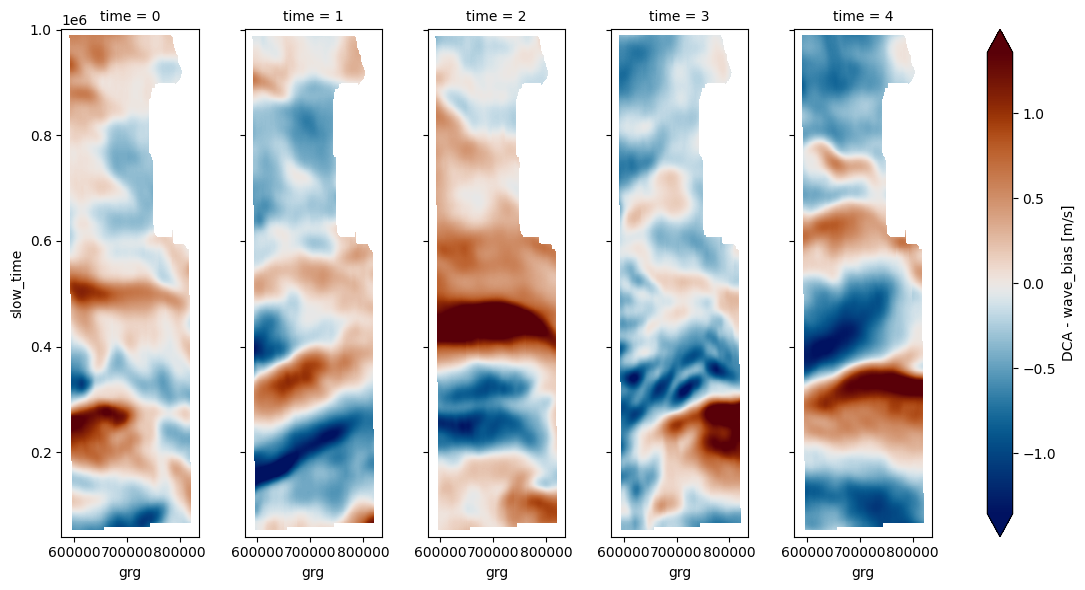

In [63]:
a = ds_currents.plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = cmc.vik, figsize = (12,6), cbar_kwargs = {'label':'DCA - wave_bias [m/s]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

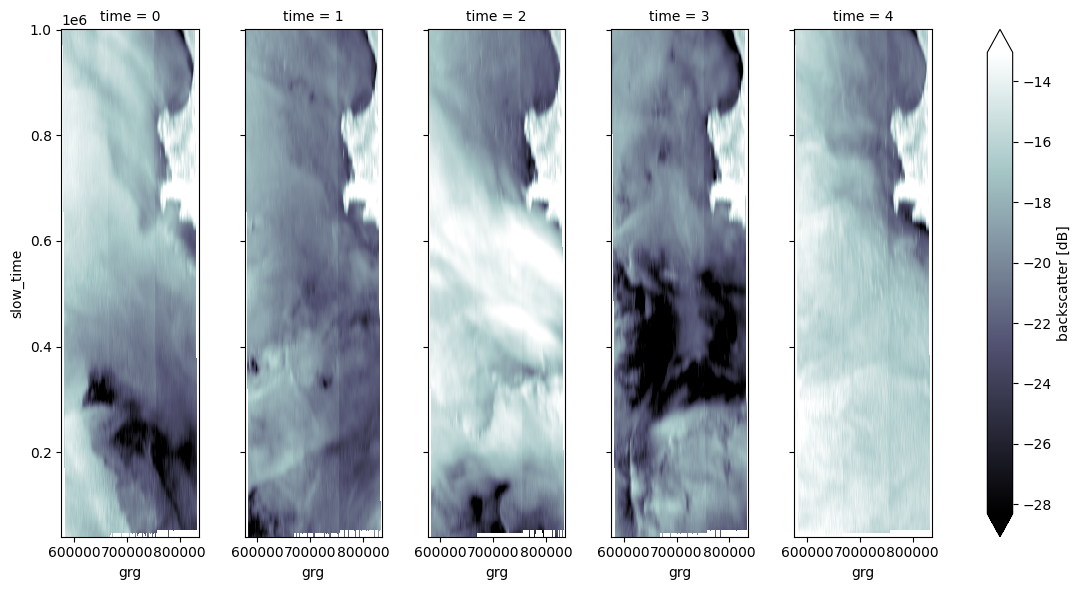

In [64]:
a = (10*np.log10(ds_nrcs)).plot(x='grg', y = 'slow_time', col = 'time', robust = True, cmap = 'bone', figsize = (12,6), cbar_kwargs = {'label':'backscatter [dB]'})
_ = [ax.axes.set_aspect('equal') for ax in a.axs.ravel()]

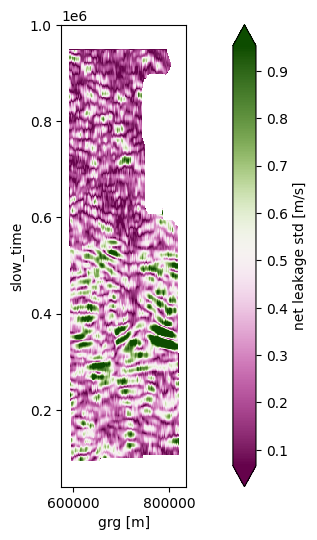

In [65]:
a = ds_noise_std.T.plot(robust = True, cmap = cmc.bam, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')

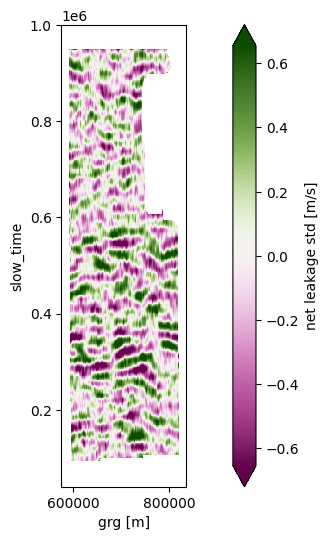

In [66]:
a = ds_noise_mean.T.plot(robust = True, cmap = cmc.bam, figsize = (12,6), cbar_kwargs = {'label':'net leakage std [m/s]'})
a.axes.set_aspect('equal')